In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load datasets from the 'data' folder
apps = pd.read_csv('data/apps.csv')
user_reviews = pd.read_csv('data/user_reviews.csv')

# Display first few rows
print("Apps Data:")
display(apps.head())

print("\nUser Reviews Data:")
display(user_reviews.head())


Apps Data:


Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  January 15, 2018   
2       Everyone               Art & Design    August 1, 2018   
3           Teen               Art & Design      June 8, 2018   
4       Everyone    Art & Design;Creativity     June 20, 2018   

          Current Ver   Android Ver  
0               1.0.0  4.0.3 and up  
1               2.0.0  4.0.3 and up  
2               1.2.4  4.0.3 and up  
3  Varies with device    4.2 and up  
4                 1.1    4.4 and up


User Reviews Data:


App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

In [5]:
# Drop missing values
apps_cleaned = apps.dropna()

# Remove duplicates
apps_cleaned = apps_cleaned.drop_duplicates()

# Save cleaned data to 'data' folder
apps_cleaned.to_csv('data/cleaned_apps.csv', index=False)
print("Cleaned apps data saved to 'data/cleaned_apps.csv'")

# Clean user reviews by dropping rows with missing values
reviews_cleaned = user_reviews.dropna()
reviews_cleaned.to_csv('data/cleaned_reviews.csv', index=False)
print("Cleaned reviews data saved to 'data/cleaned_reviews.csv'")


Cleaned apps data saved to 'data/cleaned_apps.csv'
Cleaned reviews data saved to 'data/cleaned_reviews.csv'


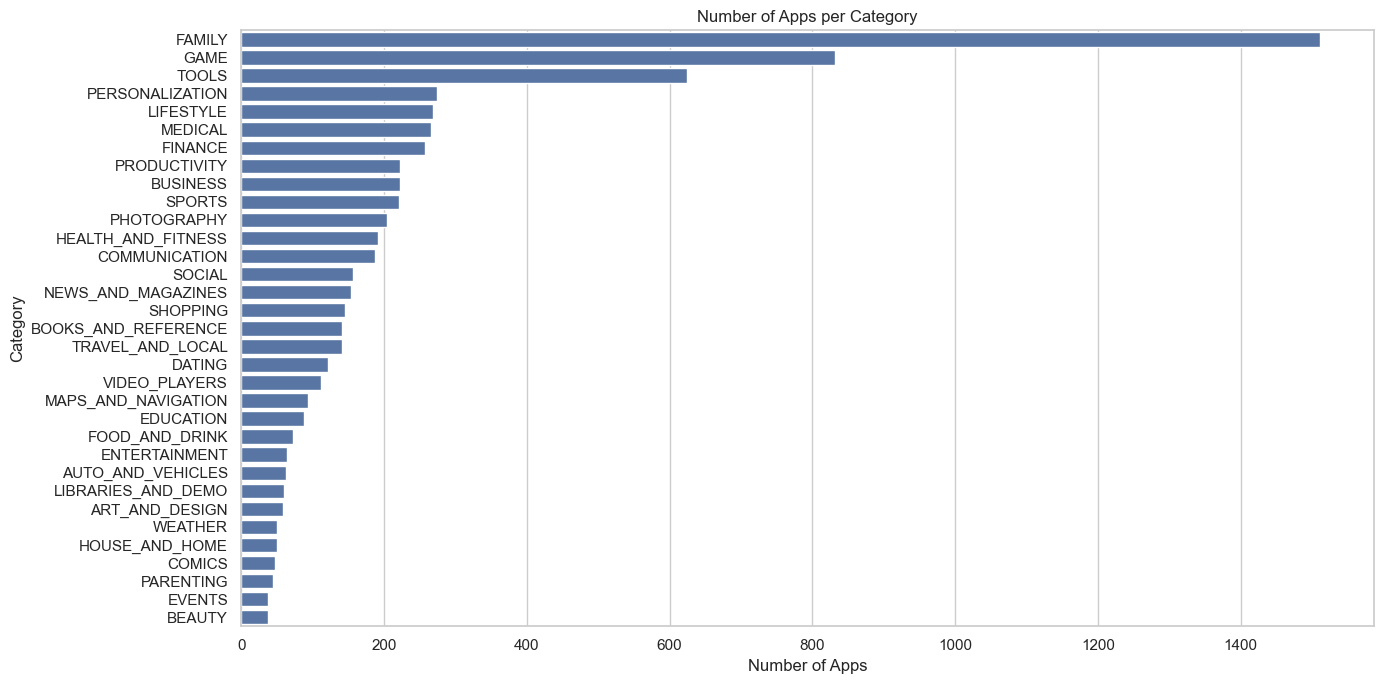

In [6]:
plt.figure(figsize=(14,7))
sns.countplot(data=apps_cleaned, y='Category', order=apps_cleaned['Category'].value_counts().index)
plt.title('Number of Apps per Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


In [7]:
plt.figure(figsize=(10,6))
sns.histplot(apps_cleaned['Rating'].dropna(), bins=30, kde=True)
plt.title('App Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [8]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=apps_cleaned, x='Rating', y='Installs')
plt.title('Installs vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.tight_layout()
plt.show()


In [9]:
print("Summary statistics for cleaned apps data:")
display(apps_cleaned.describe())


Summary statistics for cleaned apps data:


Unnamed: 0       Rating       Reviews         Size
count   7021.000000  7021.000000  7.021000e+03  7021.000000
mean    5638.433984     4.160704  1.448960e+05    21.767597
std     3079.108366     0.559241  1.024428e+06    22.731237
min        0.000000     1.000000  1.000000e+00     0.000000
25%     3087.000000     4.000000  8.400000e+01     4.900000
50%     5716.000000     4.300000  1.546000e+03    13.000000
75%     8292.000000     4.500000  2.658700e+04    31.000000
max    10840.000000     5.000000  4.489172e+07   100.000000

In [10]:
# Compute average sentiment polarity per app (if Sentiment_Polarity exists)
if 'Sentiment_Polarity' in reviews_cleaned.columns and 'App' in reviews_cleaned.columns:
    avg_sentiment = reviews_cleaned.groupby('App')['Sentiment_Polarity'].mean().reset_index()
    avg_sentiment = avg_sentiment.sort_values(by='Sentiment_Polarity', ascending=False)
    print("Top 5 apps by average sentiment polarity:")
    display(avg_sentiment.head())
else:
    print("Sentiment_Polarity or App column not found in cleaned reviews.")


Top 5 apps by average sentiment polarity:


App  Sentiment_Polarity
846                                           HomeWork            1.000000
756                                      Google Slides            0.933333
435  Daily Workouts - Exercise Fitness Routine Trainer            0.800000
218            Bed Time Fan - White Noise Sleep Sounds            0.781250
330                     Cameringo Lite. Filters Camera            0.770269

In [16]:
import plotly.express as px

# Interactive Rating vs Installs
fig = px.scatter(apps_cleaned, x='Rating', y='Installs', 
                 size='Reviews', color='Category',
                 title='Interactive: Rating vs Installs')
fig.show()

# Interactive bar chart: average rating per category
avg_rating = apps_cleaned.groupby('Category')['Rating'].mean().reset_index()
fig = px.bar(avg_rating.sort_values(by='Rating'), 
             x='Rating', y='Category', orientation='h',
             title='Average App Rating by Category')
fig.show()


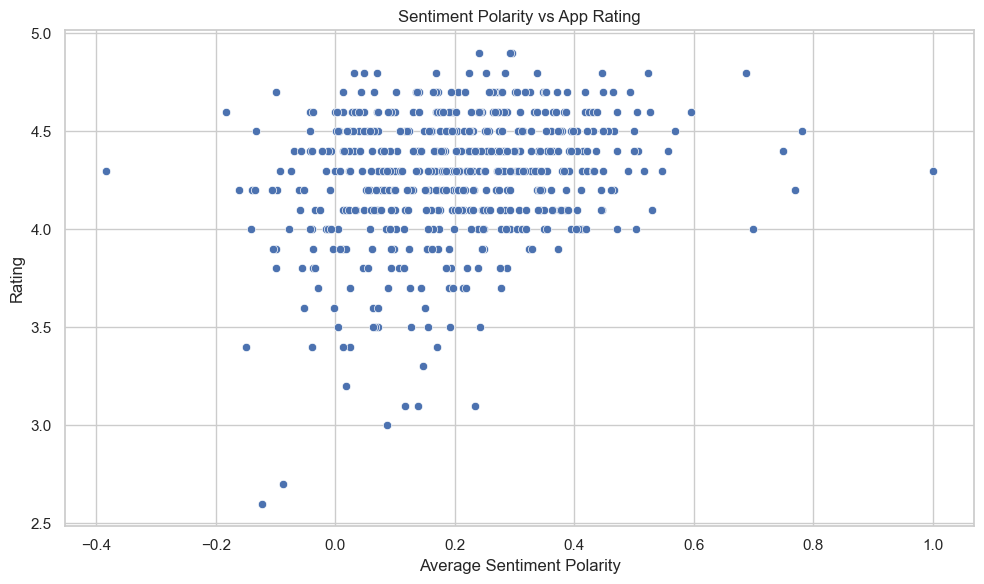

In [17]:
# Merge avg_sentiment with apps data
merged_df = apps_cleaned.merge(avg_sentiment, on='App', how='inner')

# Correlation between sentiment polarity and rating
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='Sentiment_Polarity', y='Rating')
plt.title("Sentiment Polarity vs App Rating")
plt.xlabel("Average Sentiment Polarity")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


In [18]:
# Export apps with high rating & sentiment
top_apps = merged_df[(merged_df['Rating'] > 4.5) & (merged_df['Sentiment_Polarity'] > 0.3)]
top_apps.to_csv('data/top_positive_apps.csv', index=False)
print("Exported top positive apps.")


Exported top positive apps.
